# Choosing Sagittarius Potentials

**Models derived from:**  
Vasiliev E., Belokurov V., 2020, arXiv, arXiv:2006.02929

In [1]:
from galpy.potential import HernquistPotential, NFWPotential,vcirc
from galpy.util.bovy_conversion import mass_in_msol, dens_in_msolpc3
import astropy.units as apu
import numpy as np
import matplotlib.pyplot as plt
from galpy.util import bovy_plot
import pickle
bovy_plot.bovy_print(axes_labelsize=17.,text_fontsize=16.,xtick_labelsize=14.,ytick_labelsize=14.)

FilePath='/epsen_data/scr/bennett/Sgr-VerticalWaves/'

The mass of Sgr1 within 3 kpc is:  4.77 x 10^9 Msun
The mass of Sgr2 within 3 kpc is:  2.5 x 10^9 Msun
The mass of Sgr3 within 3 kpc is:  1.72 x 10^9 Msun
The mass of Sgr4 within 3 kpc is:  0.58 x 10^9 Msun
The mass of Sgr5 within 3 kpc is:  0.33 x 10^9 Msun


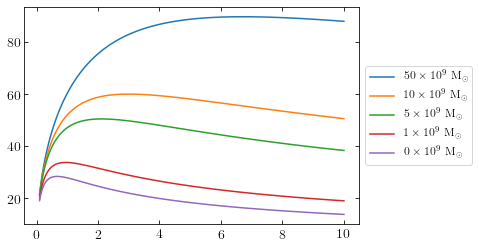

In [2]:
Rspace= np.geomspace(0.1,10.,101)

halo_masses= [5e10,1e10,5e9,1e9,5e8]
halo_radius= [3.*np.sqrt(halo_masses[0]/halo_masses[1]),3.,3.*np.sqrt(halo_masses[2]/halo_masses[1]),
             3.*np.sqrt(halo_masses[3]/halo_masses[1]),3.*np.sqrt(halo_masses[4]/halo_masses[1])]

halo= np.empty(5,dtype='object')
for i in range(5):
    halo[i]= HernquistPotential(amp=halo_masses[i]/mass_in_msol(220.,8.)*2.,a=halo_radius[i]/8.)
    halo[i].turn_physical_off()
    print('The mass of Sgr'+str(i+1)+' within 3 kpc is: ',np.round(halo[i].mass(3/8.)*mass_in_msol(220.,8.)/10**9,2),'x 10^9 Msun')

    
fig = plt.figure()
ax = plt.subplot(111)

for i in range(5):
    ax.plot(Rspace,halo[i].vcirc(Rspace/8.)*220.,label=r'$'+str(int(halo_masses[i]/1e9))+r'\times 10^9\,\,\mathrm{M_\odot}$')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

The mass of stlr1 within 3 kpc is:  0.45 x 10^9 Msun
The mass of stlr2 within 3 kpc is:  0.14 x 10^9 Msun
The mass of stlr3 within 3 kpc is:  0.08 x 10^9 Msun
The mass of stlr4 within 3 kpc is:  0.02 x 10^9 Msun
The mass of stlr5 within 3 kpc is:  0.01 x 10^9 Msun


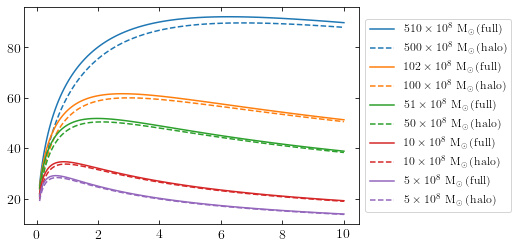

In [3]:
stlr_masses= [1e9,0.2e9,0.1e9,0.02e9,0.01e9]
stlr_radius= [0.65*np.sqrt(stlr_masses[0]/stlr_masses[1]),0.65,0.65*np.sqrt(stlr_masses[2]/stlr_masses[1]),
             0.65*np.sqrt(stlr_masses[3]/stlr_masses[1]),0.65*np.sqrt(stlr_masses[4]/stlr_masses[1])]

stlr= np.empty(5,dtype='object')
sgr= np.empty(5,dtype='object')
stlrmass= np.empty(5)

for i in range(5):
    stlr[i]= HernquistPotential(amp=stlr_masses[i]/mass_in_msol(220.,8.)*2.,a=stlr_radius[i]/8.)
    sgr[i]= halo[i]+stlr[i]
    stlrmass[i]= stlr[i].mass(3./8.)*mass_in_msol(220.,8.)
    print('The mass of stlr'+str(i+1)+' within 3 kpc is: ',np.round(stlrmass[i]/10**9,2),'x 10^9 Msun')


fig = plt.figure()
ax = plt.subplot(111)

for i in range(5):
    ax.plot(Rspace,vcirc(sgr[i],Rspace/8.)*220.,c='C'+str(i),ls='-',
            label=r'$'+str(int((halo_masses[i]+stlr_masses[i])/1e8))+r'\times 10^8\,\,\mathrm{M_\odot\,(full)}$')
    ax.plot(Rspace,halo[i].vcirc(Rspace/8.)*220.,c='C'+str(i),ls='--',
            label=r'$'+str(int(halo_masses[i]/1e8))+r'\times 10^8\,\,\mathrm{M_\odot\,(halo)}$')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

## Caclulate half mass radiusof each potential

In [4]:
Rspace= np.geomspace(0.1,200.,101)

sgrm= np.empty([5,101])
for i in range(5):
    sgrm[i]= np.array([np.sum([s.mass(r/8.) for s in sgr[i]]) for r in Rspace])/((halo_masses[i]+stlr_masses[i])/mass_in_msol(220.,8.))

In [6]:
from scipy.interpolate import interp1d

rhm= np.empty(5)
for i in range(5):
    f= interp1d(sgrm[i],Rspace)
    rhm[i]= f(0.5)

In [7]:
with open(FilePath+'data/SgrModel/stlr_masses.dat','wb') as f:
    np.savetxt(f,stlr_masses)
with open(FilePath+'data/SgrModel/halo_masses.dat','wb') as f:
    np.savetxt(f,halo_masses)
with open(FilePath+'data/SgrModel/stlr_radius.dat','wb') as f:
    np.savetxt(f,stlr_radius)
with open(FilePath+'data/SgrModel/halo_radius.dat','wb') as f:
    np.savetxt(f,halo_radius)
with open(FilePath+'data/SgrModel/sgr_rhm.dat','wb') as f:
    np.savetxt(f,rhm)

In [8]:
with open(FilePath+'data/SgrModel/sgr_rhm.dat','rb') as f:
    rhm= np.loadtxt(f)
with open(FilePath+'data/SgrModel/halo_masses.dat','rb') as f:
    halo_masses= np.loadtxt(f)
with open(FilePath+'data/SgrModel/stlr_masses.dat','rb') as f:
    stlr_masses= np.loadtxt(f)
sgr_masses= halo_masses+stlr_masses

In [9]:
print(stlr_radius)

[1.4534441853748634, 0.65, 0.45961940777125593, 0.20554804791094466, 0.14534441853748634]
